In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
import fit_library_n

%matplotlib nbagg
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# FITTING PROCEDURE
def fit_FBK_gain(data,voltage,n,gain_array,gainerr_array,bounds,param,volts,spe_array,spe_res,GAIN=961):
    x = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
    y = (data[voltage][:,1])/np.max(data[voltage][:,1])
    fit = fit_library_n.gaussn_least(x,y,n)
    out_param,perr = fit(bounds,*param)
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,fit.evaluate())
    print out_param
    print perr

    T_int = 400E-9
    #GAIN  = 961
    pV = (out_param[1]/1E9) / T_int; pV_err = (perr[1]/1E9) / T_int
    I_i = pV / GAIN;                 I_i_err = pV_err / GAIN
    Q_i = I_i * T_int;               Q_i_err = I_i_err * T_int
    GAIN_SiPM = Q_i / 1.602E-19;     GAIN_SiPM_err = Q_i_err / 1.602E-19
    print("SiPM GAIN = %e +- %e for VDC = %f" % (np.abs(GAIN_SiPM),np.abs(GAIN_SiPM_err),volts[voltage]))
    gain_array[voltage]=GAIN_SiPM
    spe_array[voltage]=Q_i/1E-12
    spe_res[voltage]=((out_param[2+n+1]/1E9)/GAIN)/1E-12
    gainerr_array[voltage] = GAIN_SiPM_err
    
    #return GAIN


# Read histogram data from OSCILLOSCOPE

#data=np.array([]).reshape(201,0)
data=[]
filenames=['VDD_365_G961.dat','VDD_370_G961.dat',
           'VDD_375_G961.dat','VDD_380_G961.dat',
           'VDD_385_G961.dat','VDD_390_G961.dat']
voltages_array = np.array([36.5,37.0,37.5,38.0,38.5,39.0])
gain_array = np.zeros(6)
gainerr_array = np.zeros(6)
for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_RT/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

# Data normalization and Selection

voltage=5
x5 = (data[voltage][:,0]-np.min(data[voltage][:,0]))*1E9
y5 = (data[voltage][:,1])/np.max(data[voltage][:,1])

# LEAST SQUARES METHOD

fit5 = fit_library_n.gaussn_least(x5,y5,5)
param_390 =[ 1.25, 0.42,  0.80, 0.95, 0.65, 0.45, 0.25, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_390=([1.0, 0.40,  0.75, 0.8, 0.50, 0.20, 0.12, 0.04, 0.04, 0.04, 0.04, 0.04],
            [1.3, 0.47,  1.00, 1.00, 0.80, 0.60, 0.30, 0.10, 0.10, 0.12, 0.12, 0.15])
out_param,perr = fit5(bounds_390,*param_390)
plt.figure(1)
plt.plot(x5,y5)
plt.plot(x5,fit5.evaluate())
print out_param
print perr


# GAIN

T_int = 400E-9
GAIN  = 961
pV = (out_param[1]/1E9) / T_int

I_i = pV / GAIN
Q_i = I_i * T_int

GAIN = Q_i / 1.602E-19
print("SiPM GAIN = %e for VDC = %f" % (np.abs(GAIN),voltages_array[voltage]))
gain_array[voltage]=GAIN

# -------------------------------------------------------------
# -------------------------------------------------------------

param_390 =[ 1.25, 0.42,  0.80, 0.95, 0.65, 0.45, 0.25, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_390=([1.0, 0.40,  0.75, 0.8, 0.50, 0.20, 0.12, 0.04, 0.04, 0.04, 0.04, 0.04],
            [1.3, 0.47,  1.00, 1.00, 0.80, 0.60, 0.30, 0.10, 0.10, 0.12, 0.12, 0.15])

fit_FBK_gain(data,5,5,gain_array,gainerr_array,bounds_390,param_390,voltages_array)


param_385 =[ 0.45, 0.42,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_385=([0.40,0.40,  0.10,0.10,0.10,0.10,0.10,0.10, 0.04,0.04,0.04,0.04,0.04,0.04],
            [0.50,0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])

fit_FBK_gain(data,4,6,gain_array,gainerr_array,bounds_385,param_385,voltages_array)


param_380 =[ 1.47, 0.40,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_380=([1.00,0.35,  0.05,0.05,0.05,0.05,0.05,0.05, 0.04,0.04,0.04,0.04,0.04,0.04],
            [1.55,0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])
fit_FBK_gain(data,3,6,gain_array,gainerr_array,bounds_380,param_380,voltages_array)

param_375 =[ 1.81, 0.40,  
            0.80, 0.95, 0.65, 0.45, 0.25, 0.2, 
            0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
bounds_375=([1.8,0.30,  0.05,0.05,0.05,0.05,0.05,0.05, 0.04,0.04,0.04,0.04,0.04,0.04],
            [2.1, 0.47,  1.00,1.00,1.00,1.00,1.00,1.00, 0.12,0.12,0.12,0.15,0.15,0.15])
fit_FBK_gain(data,2,6,gain_array,gainerr_array,bounds_375,param_375,voltages_array)

param_370 =[0.90, 0.40,  
            0.80, 0.95, 0.65,  
            0.08, 0.08, 0.08]
bounds_370=([0.75,0.20, 0.05,0.05,0.05, 0.04,0.04,0.04],
            [1.00,0.47, 1.00,1.00,1.00, 0.12,0.12,0.12])
fit_FBK_gain(data,1,3,gain_array,gainerr_array,bounds_370,param_370,voltages_array)

param_365 =[0.90, 0.40,  
            0.80, 0.95, 0.65,  
            0.08, 0.08, 0.08]
bounds_365=([0.75,0.20, 0.05,0.05,0.05, 0.04,0.04,0.04],
            [1.00,0.47, 1.00,1.00,1.00, 0.12,0.12,0.12])
fit_FBK_gain(data,0,3,gain_array,gainerr_array,bounds_365,param_365,voltages_array)

coeff_lin, perr_lin, XI2_r = fit_library_n.line_fit(gain_array,voltages_array,gainerr_array,'','','',1,0)


coeff_lin, perr_lin, XI2_r = fit_library_n.line_fit(gain_array,voltages_array,gainerr_array,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r)))
plt.errorbar(voltages_array,gain_array,fmt='r.',yerr=gainerr_array)
plt.plot(voltages_array,fit_library_n.line(voltages_array,coeff_lin[0],coeff_lin[1]))

# GAIN AT -50C

#data=np.array([]).reshape(201,0)
data_50=[]
filenames=['VDD_365_G961.dat','VDD_370_G961.dat',
           'VDD_375_G961.dat','VDD_380_G961.dat',
           'VDD_385_G961.dat','VDD_390_G961.dat']
voltages_array_50 = np.array([36.5,37.0,37.5,38.0,38.5,39.0])
gain_array_50 = np.zeros(6)
gainerr_array_50 = np.zeros(6)
for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_50/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data_50.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   
        

param_365_50 = [3.15, 0.52, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_365_50=([2.90, 0.45, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [3.50, 0.65, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,0,5,gain_array_50,gainerr_array_50,bounds_365_50,param_365_50,voltages_array_50)

param_370_50 = [2.44, 0.60, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_370_50=([2.38, 0.55, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [2.64, 0.70, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,1,5,gain_array_50,gainerr_array_50,bounds_370_50,param_370_50,voltages_array_50)

param_375_50 = [3.20, 0.60, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_375_50=([3.1, 0.55, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [3.3, 0.70, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,2,5,gain_array_50,gainerr_array_50,bounds_375_50,param_375_50,voltages_array_50)

param_380_50 = [2.00, 0.60, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_380_50=([1.85, 0.55, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [2.15, 0.70, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,3,5,gain_array_50,gainerr_array_50,bounds_380_50,param_380_50,voltages_array_50)

param_385_50 = [2.00, 0.60, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_385_50=([1.85, 0.55, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [2.15, 0.70, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,4,5,gain_array_50,gainerr_array_50,bounds_385_50,param_385_50,voltages_array_50)

param_390_50 = [3.38, 0.60, 1.00,0.30,0.12,0.08,0.05, 0.10,0.10,0.10,0.10,0.10]
bounds_390_50=([3.00, 0.55, 0.75,0.20,0.08,0.05,0.01, 0.07,0.07,0.07,0.07,0.07],
               [3.41, 0.70, 1.25,0.40,0.15,0.12,0.12, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_50,5,5,gain_array_50,gainerr_array_50,bounds_390_50,param_390_50,voltages_array_50)

coeff_lin_50, perr_lin_50, XI2_r_50 = fit_library_n.line_fit(gain_array_50,voltages_array_50,gainerr_array_50,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-50C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_50)))
plt.errorbar(voltages_array_50,gain_array_50,fmt='r.',yerr=gainerr_array_50)
plt.plot(voltages_array_50,fit_library_n.line(voltages_array_50,coeff_lin_50[0],coeff_lin_50[1]))

# TEMP -108

In [36]:
#data=np.array([]).reshape(201,0)
data_108=[]
filenames=['VDD_3200_G961_108.dat','VDD_3225_G961_108.dat',
           'VDD_3250_G961_108.dat','VDD_3275_G961_108.dat',
           'VDD_3300_G961_108.dat','VDD_3325_G961_108.dat',
           'VDD_3350_G961_108.dat','VDD_3375_G961_108.dat',
           'VDD_3400_G961_108.dat','VDD_3425_G961_108.dat',
           'VDD_3450_G961_108.dat','VDD_3475_G961_108.dat',
           'VDD_3500_G961_108.dat']
voltages_array_108 = np.array([32.00,32.25,
                               32.50,32.75,
                               33.00,33.25,
                               33.50,33.75,
                               34.00,34.25,
                               34.50,34.75,
                               35.00])
gain_array_108 = np.zeros(13)
gainerr_array_108 = np.zeros(13)
spe_array_108 = np.zeros(np.shape(voltages_array_108)[0])
speres_array_108 = np.zeros(np.shape(voltages_array_108)[0])

for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_108/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data_108.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

VDD_3200_G961_108.dat
VDD_3225_G961_108.dat
VDD_3250_G961_108.dat
VDD_3275_G961_108.dat
VDD_3300_G961_108.dat
VDD_3325_G961_108.dat
VDD_3350_G961_108.dat
VDD_3375_G961_108.dat
VDD_3400_G961_108.dat
VDD_3425_G961_108.dat
VDD_3450_G961_108.dat
VDD_3475_G961_108.dat
VDD_3500_G961_108.dat


`ftol` termination condition is satisfied.
Function evaluations 15, initial cost 5.6855e+00, final cost 3.0239e+00, first-order optimality 1.75e-04.


<IPython.core.display.Javascript object>


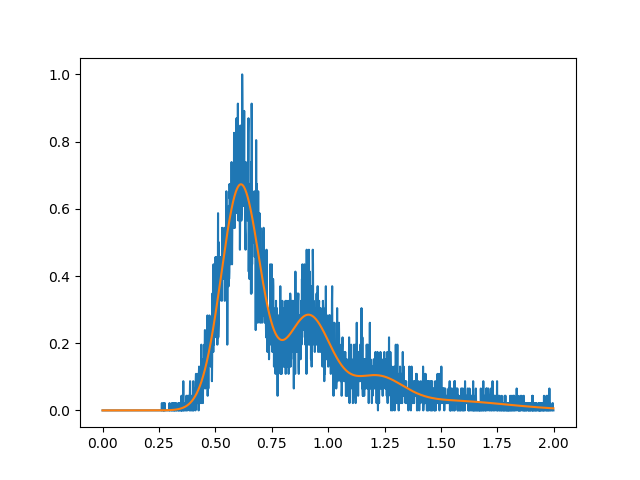

[ 0.61246671  0.29915395  0.66989966  0.27764502  0.08586929  0.0293095
  0.08587433  0.09883169  0.11506562  0.2763527 ]
[ 0.00108153  0.0042651   0.00552496  0.00662879  0.00597648  0.00423068
  0.00104642  0.00420876  0.01475268  0.05816592]
SiPM GAIN = 1.943161e+06 +- 2.770406e+04 for VDC = 32.000000


In [37]:
param_3200_108  = [0.60, 0.30, 0.75,0.30,0.12,0.05, 0.10,0.10,0.10,0.10]
bounds_3200_108 =([0.50, 0.25, 0.50,0.20,0.05,0.01, 0.07,0.07,0.07,0.07],
                  [0.70, 0.65, 1.00,0.40,0.17,0.07, 0.20,0.20,0.30,0.30])

fit_FBK_gain(data_108,0,4,gain_array_108, gainerr_array_108, bounds_3200_108, param_3200_108, voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 17, initial cost 1.4782e+00, final cost 9.0471e-01, first-order optimality 2.42e-05.


<IPython.core.display.Javascript object>


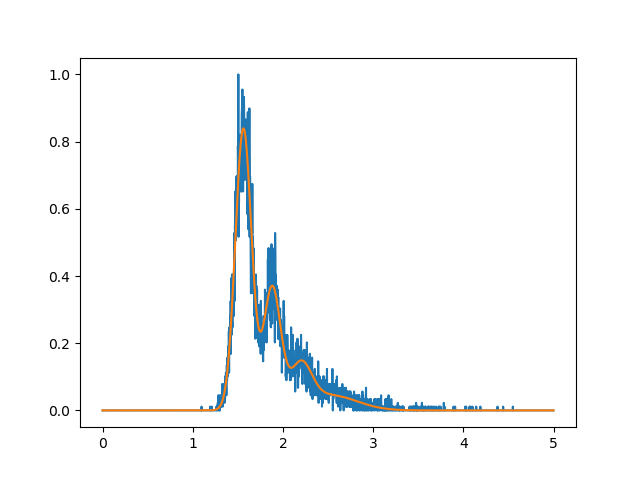

[ 1.56095244  0.31807776  0.83797977  0.36176619  0.12156106  0.04551558
  0.0895956   0.09424226  0.11800054  0.29999997]
[ 0.00069095  0.00225239  0.00467657  0.00510801  0.00490063  0.00318697
  0.00070322  0.00239328  0.0079851   0.02647057]
SiPM GAIN = 2.066081e+06 +- 1.463046e+04 for VDC = 32.250000


In [38]:
param_3225_108  = [1.57, 0.30, 0.75,0.30,0.12,0.05, 0.10,0.10,0.10,0.10]
bounds_3225_108 =([1.40, 0.25, 0.50,0.20,0.05,0.01, 0.07,0.07,0.07,0.07],
                  [1.70, 0.65, 1.00,0.40,0.17,0.07, 0.20,0.20,0.30,0.30])

fit_FBK_gain(data_108,1,4,gain_array_108, gainerr_array_108, bounds_3225_108, param_3225_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 1.7333e+00, final cost 7.5374e-01, first-order optimality 3.50e-05.


<IPython.core.display.Javascript object>


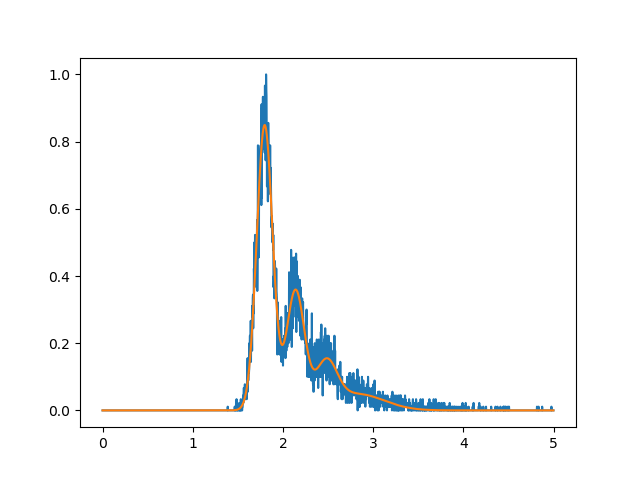

[ 1.79655141  0.34116071  0.84821864  0.3537114   0.12840374  0.04884021
  0.08787031  0.09985383  0.1174054   0.29999998]
[ 0.00058284  0.00194616  0.00429749  0.00426797  0.00455262  0.00271153
  0.00059733  0.0021799   0.00620448  0.02190925]
SiPM GAIN = 2.216017e+06 +- 1.264135e+04 for VDC = 32.500000


In [39]:
param_3250_108  = [1.80, 0.30, 0.75,0.30,0.12,0.05, 0.10,0.10,0.10,0.10]
bounds_3250_108 =([1.70, 0.25, 0.50,0.20,0.05,0.01, 0.07,0.07,0.07,0.07],
                  [1.90, 0.65, 1.00,0.40,0.17,0.07, 0.20,0.20,0.30,0.30])

fit_FBK_gain(data_108,2,4,gain_array_108, gainerr_array_108, bounds_3250_108, param_3250_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 1.1786e+01, final cost 7.2367e-01, first-order optimality 1.86e-04.


<IPython.core.display.Javascript object>


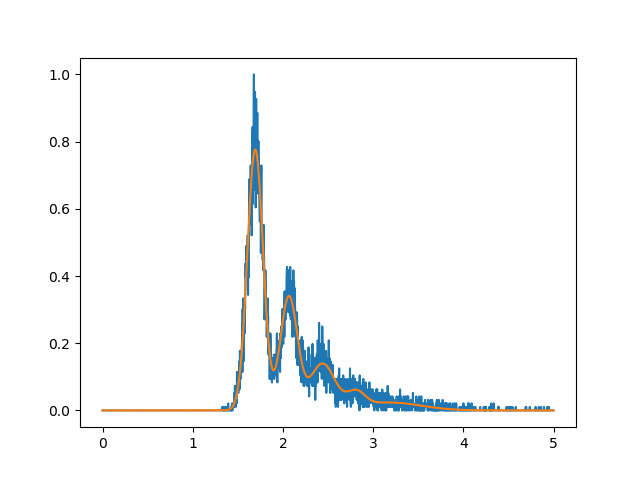

[ 1.69232981  0.37209987  0.77666862  0.33695036  0.13715018  0.04479535
  0.02357172  0.08676317  0.09483425  0.13874296  0.099227    0.34720396]
[ 0.00056155  0.00157695  0.00423766  0.00413016  0.00371854  0.00436964
  0.00233463  0.00058481  0.00171961  0.00599945  0.01206702  0.04624787]
SiPM GAIN = 2.416983e+06 +- 1.024311e+04 for VDC = 32.750000


In [40]:
param_3275_108  = [1.80, 0.27, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3275_108 =([1.60, 0.25, 0.50,0.20,0.05,0.01,0.00, 0.07,0.07,0.07,0.07,0.07],
                  [1.90, 0.65, 1.00,0.40,0.17,0.07,0.04, 0.20,0.20,0.30,0.30,0.40])

fit_FBK_gain(data_108,3,5,gain_array_108, gainerr_array_108, bounds_3275_108, param_3275_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 1.8031e+00, final cost 2.7824e-01, first-order optimality 2.85e-05.


<IPython.core.display.Javascript object>


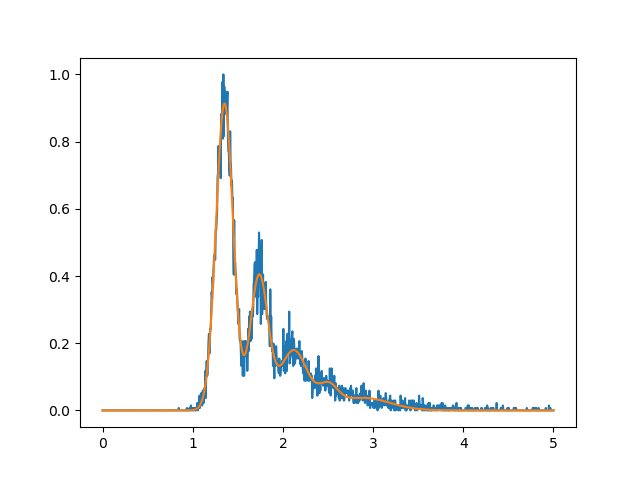

[ 1.35251554  0.38318491  0.91332409  0.39748608  0.17791865  0.06087608
  0.03736001  0.09536525  0.09834074  0.15210981  0.10570766  0.29999718]
[ 0.000631    0.00174288  0.0050228   0.00516742  0.0042745   0.00567859
  0.00304618  0.00066324  0.00189776  0.00634628  0.01136952  0.03369578]
SiPM GAIN = 2.488986e+06 +- 1.132090e+04 for VDC = 33.000000


In [41]:
param_3300_108  = [1.35, 0.30, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3300_108 =([1.25, 0.25, 0.50,0.20,0.05,0.01,0.01, 0.07,0.07,0.07,0.07,0.07],
                  [1.90, 0.65, 1.00,0.45,0.20,0.07,0.07, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_108,4,5,gain_array_108, gainerr_array_108, bounds_3300_108, param_3300_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 4.4443e+00, final cost 1.0540e+00, first-order optimality 1.12e-04.


<IPython.core.display.Javascript object>


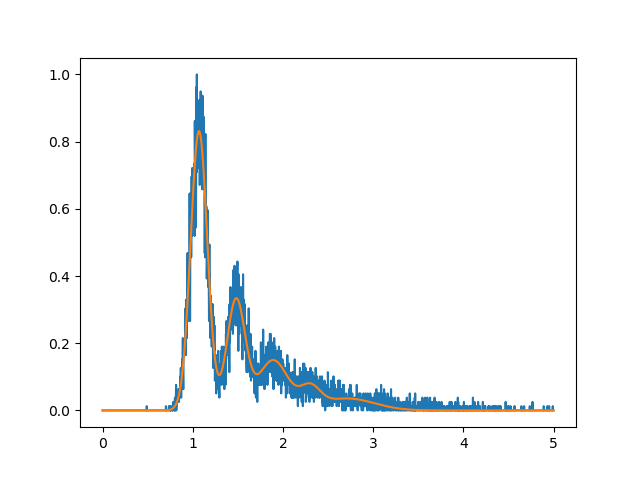

[ 1.06873074  0.41047559  0.83151738  0.32703355  0.14888002  0.05980872
  0.03549252  0.0922117   0.10177768  0.16563869  0.11120972  0.29999939]
[ 0.00064431  0.00197422  0.00495382  0.00495124  0.00395044  0.00549242
  0.00292215  0.00066693  0.00213917  0.00755529  0.01147903  0.03483156]
SiPM GAIN = 2.666253e+06 +- 1.282356e+04 for VDC = 33.250000


In [42]:
param_3325_108  = [1.1, 0.30, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3325_108 =([1.00, 0.25, 0.50,0.20,0.05,0.01,0.01, 0.07,0.07,0.07,0.07,0.07],
                  [1.90, 0.65, 1.00,0.40,0.20,0.07,0.04, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_108,5,5,gain_array_108, gainerr_array_108, bounds_3325_108, param_3325_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 3.9866e+00, final cost 7.8623e-01, first-order optimality 1.66e-04.


<IPython.core.display.Javascript object>


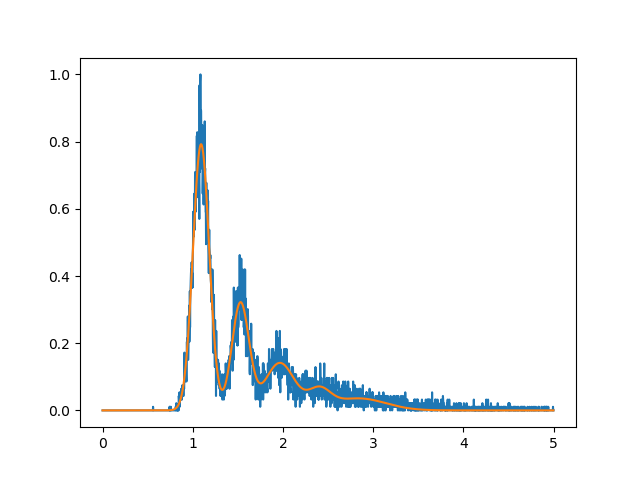

[ 1.09204371  0.4361995   0.79226241  0.31833221  0.14093029  0.05507676
  0.03582601  0.0902057   0.09528039  0.16291864  0.12276798  0.29999987]
[ 0.00056611  0.00158268  0.00430776  0.00423243  0.00337521  0.0045061
  0.00250796  0.00057479  0.00169369  0.00607601  0.01132737  0.03006606]
SiPM GAIN = 2.833344e+06 +- 1.028032e+04 for VDC = 33.500000


In [43]:
param_3350_108  = [1.1, 0.30, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3350_108 =([1.00, 0.25, 0.50,0.20,0.05,0.01,0.01, 0.07,0.07,0.07,0.07,0.07],
                  [1.90, 0.65, 1.00,0.40,0.20,0.07,0.04, 0.20,0.20,0.30,0.30,0.30])

fit_FBK_gain(data_108,6,5,gain_array_108, gainerr_array_108, bounds_3350_108, param_3350_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 2.0296e+00, final cost 3.0318e-01, first-order optimality 2.36e-05.


<IPython.core.display.Javascript object>


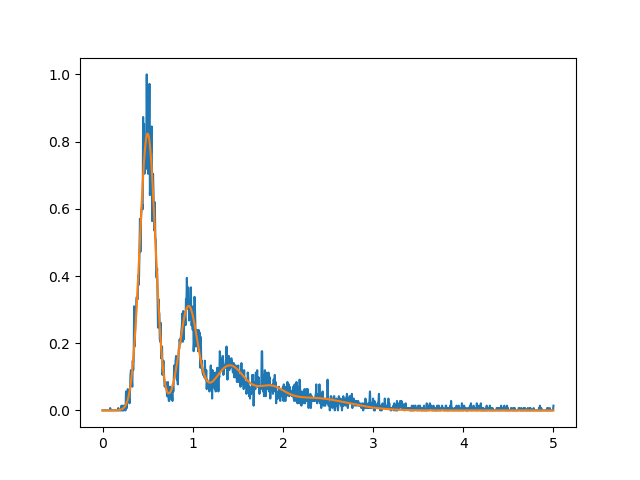

[ 0.49971489  0.45231021  0.82378623  0.30554198  0.13067223  0.04978598
  0.03751581  0.08664226  0.1007304   0.17776568  0.15000001  0.3999999 ]
[ 0.0006623   0.00224255  0.00545074  0.00518258  0.00436926  0.00508336
  0.00294178  0.00066892  0.00227719  0.00900699  0.01759579  0.04034837]
SiPM GAIN = 2.937991e+06 +- 1.456650e+04 for VDC = 33.750000


In [44]:
param_3375_108  = [0.5, 0.30, 0.75,0.30,0.12,0.05,0.02, 0.10,0.12,0.17,0.25,0.35]
bounds_3375_108 =([0.4, 0.25, 0.50,0.20,0.00,0.00,0.00, 0.07,0.10,0.15,0.15,0.15],
                  [0.7, 0.65, 1.00,0.40,0.20,0.07,0.07, 0.10,0.15,0.20,0.30,0.40])

fit_FBK_gain(data_108,7,5,gain_array_108, gainerr_array_108, bounds_3375_108, param_3375_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 7.1138e+00, final cost 3.5599e-01, first-order optimality 1.52e-05.


<IPython.core.display.Javascript object>


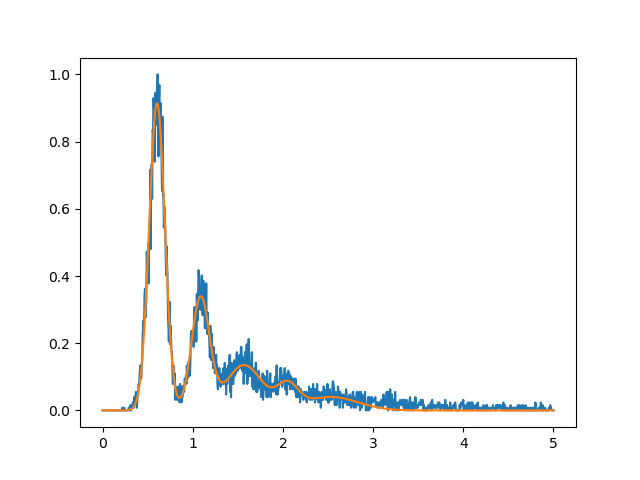

[ 0.60421168  0.48215667  0.91388084  0.33257428  0.13466441  0.07        0.04
  0.08701061  0.09966176  0.19999987  0.11860781  0.3       ]
[ 0.00064546  0.00200798  0.00588609  0.0057268   0.00415407  0.00622438
  0.00328671  0.00064928  0.00217735  0.01027275  0.0116565   0.0368185 ]
SiPM GAIN = 3.131860e+06 +- 1.304287e+04 for VDC = 34.000000


In [45]:
param_3400_108  = [0.5, 0.60, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3400_108 =([0.4, 0.25, 0.50,0.20,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07],
                  [0.7, 0.65, 1.00,0.40,0.20,0.07,0.04, 0.20,0.20,0.20,0.20,0.30])

fit_FBK_gain(data_108,8,5,gain_array_108, gainerr_array_108, bounds_3400_108, param_3400_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 2.6188e+00, final cost 3.6558e-01, first-order optimality 4.27e-05.


<IPython.core.display.Javascript object>


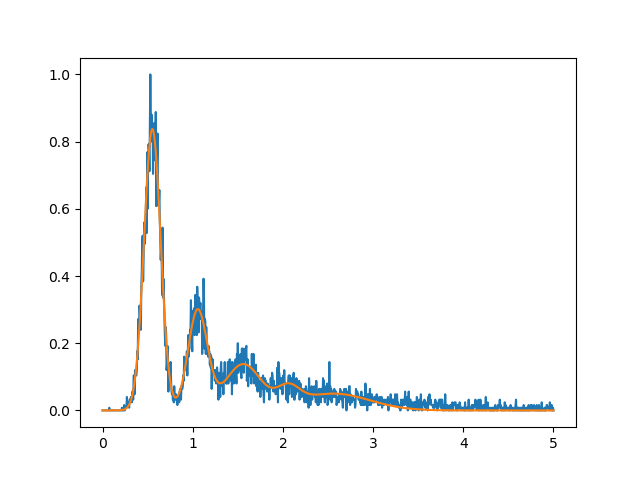

[ 0.55232628  0.50207107  0.83760328  0.29549329  0.13578862  0.05235685
  0.05008646  0.09213484  0.10658024  0.2         0.12514059  0.4       ]
[ 0.00073508  0.00240422  0.00579851  0.00553442  0.00433277  0.0058167
  0.00294904  0.00074018  0.00259305  0.00999184  0.0161663   0.03354514]
SiPM GAIN = 3.261214e+06 +- 1.561668e+04 for VDC = 34.250000


In [46]:
param_3425_108  = [0.5, 0.60, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3425_108 =([0.4, 0.25, 0.50,0.20,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07],
                  [0.7, 0.65, 1.00,0.40,0.20,0.07,0.06, 0.20,0.20,0.20,0.20,0.40])

fit_FBK_gain(data_108,9,5,gain_array_108, gainerr_array_108, bounds_3425_108, param_3425_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 2.3489e+00, final cost 4.1969e-01, first-order optimality 4.63e-05.


<IPython.core.display.Javascript object>


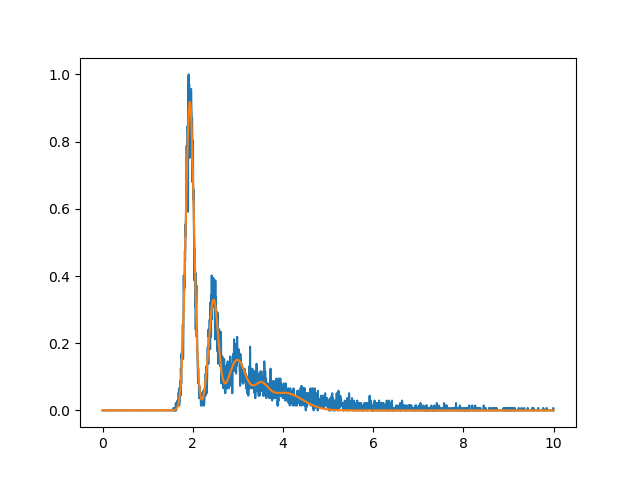

[ 1.93579017  0.52378039  0.91833606  0.32453555  0.1486253   0.05732306
  0.05236515  0.0916426   0.10800074  0.2         0.15598374  0.4       ]
[ 0.00050678  0.0016854   0.00440488  0.00410792  0.00322423  0.00415094
  0.00229778  0.00050888  0.00178062  0.00659208  0.01268229  0.0243411 ]
SiPM GAIN = 3.402227e+06 +- 1.094758e+04 for VDC = 34.500000


In [47]:
param_3450_108  = [1.9, 0.60, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3450_108 =([1.8, 0.25, 0.50,0.20,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07],
                  [2.0, 0.65, 1.00,0.40,0.20,0.07,0.06, 0.20,0.20,0.20,0.20,0.40])

fit_FBK_gain(data_108,10,5,gain_array_108, gainerr_array_108, bounds_3450_108, param_3450_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 9.8168e-01, final cost 3.8891e-01, first-order optimality 1.09e-04.


<IPython.core.display.Javascript object>


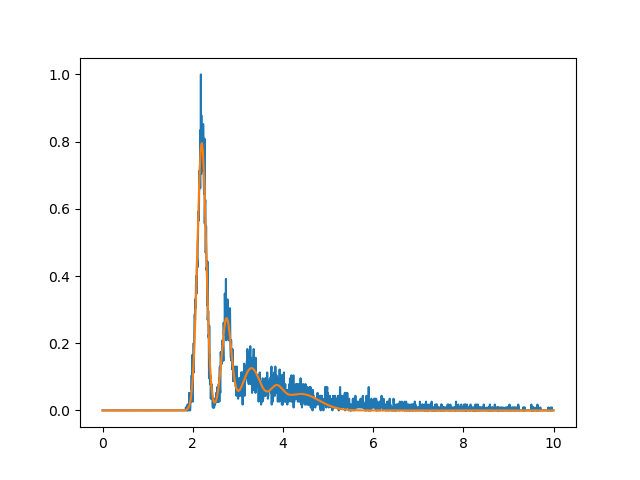

[ 2.19909162  0.54980549  0.79543001  0.27160772  0.12468992  0.05355397
  0.04893277  0.09728699  0.10708117  0.2         0.14556274  0.4       ]
[ 0.00057947  0.0017907   0.00411451  0.00393704  0.00303455  0.00400695
  0.00213884  0.00058198  0.0019805   0.00709153  0.01248165  0.02536221]
SiPM GAIN = 3.571274e+06 +- 1.163156e+04 for VDC = 34.750000


In [49]:
param_3475_108  = [2.2, 0.60, 0.75,0.30,0.12,0.05,0.02, 0.10,0.10,0.10,0.10,0.10]
bounds_3475_108 =([2.1, 0.25, 0.50,0.20,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07],
                  [2.3, 0.65, 1.00,0.40,0.20,0.07,0.06, 0.20,0.20,0.20,0.20,0.40])

fit_FBK_gain(data_108,11,5,gain_array_108, gainerr_array_108, bounds_3475_108, param_3475_108,voltages_array_108,spe_array_108,speres_array_108)

`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 9.1924e-01, final cost 1.5813e-01, first-order optimality 2.84e-05.


<IPython.core.display.Javascript object>


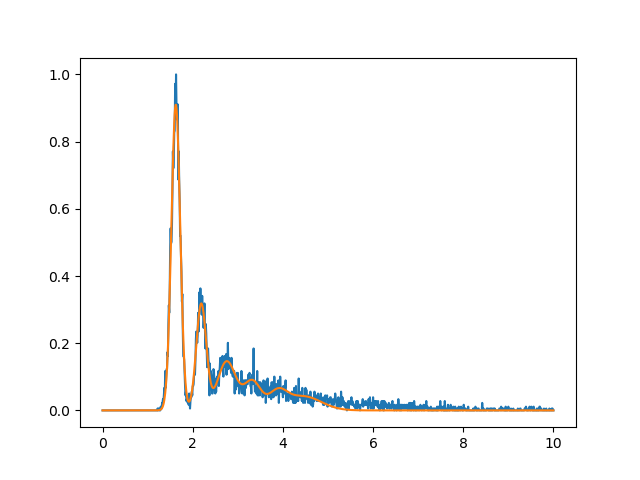

[ 1.62435304  0.56452167  0.91045117  0.31554317  0.14572664  0.08636343
  0.04930941  0.04213927  0.09785542  0.11057432  0.20231702  0.18763636
  0.20019214  0.39999999]
[ 0.00064683  0.00199108  0.00522909  0.00493283  0.00381153  0.00415506
  0.00471554  0.00304085  0.00064986  0.00223368  0.00802467  0.01284305
  0.02330572  0.03786839]
SiPM GAIN = 3.666863e+06 +- 1.293312e+04 for VDC = 35.000000


In [50]:
param_3500_108  = [1.6, 0.60, 0.75,0.30,0.12,0.05,0.02,0.01, 0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3500_108 =([1.5, 0.25, 0.50,0.20,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07],
                  [1.7, 0.65, 1.00,0.40,0.20,0.10,0.07,0.07, 0.30,0.30,0.30,0.30,0.40,0.40])

fit_FBK_gain(data_108,12,6,gain_array_108, gainerr_array_108, bounds_3500_108, param_3500_108,voltages_array_108,spe_array_108,speres_array_108)

Max Linearity Error = 1.751%


<IPython.core.display.Javascript object>


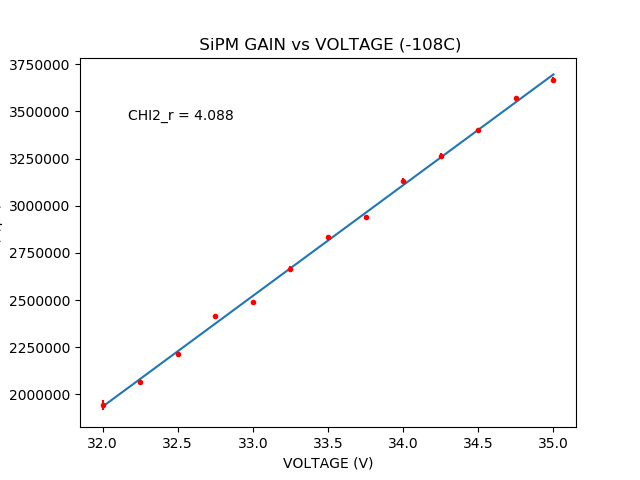

In [51]:
coeff_lin_108, perr_lin_108, XI2_r_108 = fit_library_n.line_fit(gain_array_108,voltages_array_108,gainerr_array_108,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-108C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_108)))
plt.errorbar(voltages_array_108,gain_array_108,fmt='r.',yerr=gainerr_array_108)
plt.plot(voltages_array_108,fit_library_n.line(voltages_array_108,coeff_lin_108[0],coeff_lin_108[1]))

# TEMP -110

In [52]:
#data=np.array([]).reshape(201,0)
data_110=[]
filenames=['F2FBK00065.dat','F2FBK00066.dat',
           'F2FBK00064.dat','F2FBK00063.dat',
           'F2FBK00061.dat','F2FBK00068.dat',
           'F2FBK00069.dat','F2FBK00070.dat',
           'F2FBK00071.dat']
voltages_array_110 = np.array([32.00,32.50,
                               33.00,33.50,
                               34.00,34.50,
                               35.00,35.50,
                               36.00])
gain_array_110 = np.zeros(9)
gainerr_array_110 = np.zeros(9)
spe_array_110 = np.zeros(np.shape(voltages_array_110)[0])
speres_array_110 = np.zeros(np.shape(voltages_array_110)[0])

for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_110/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data_110.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   

F2FBK00065.dat
F2FBK00066.dat
F2FBK00064.dat
F2FBK00063.dat
F2FBK00061.dat
F2FBK00068.dat
F2FBK00069.dat
F2FBK00070.dat
F2FBK00071.dat


`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 4.9650e+01, final cost 8.0269e-01, first-order optimality 1.01e-04.


<IPython.core.display.Javascript object>


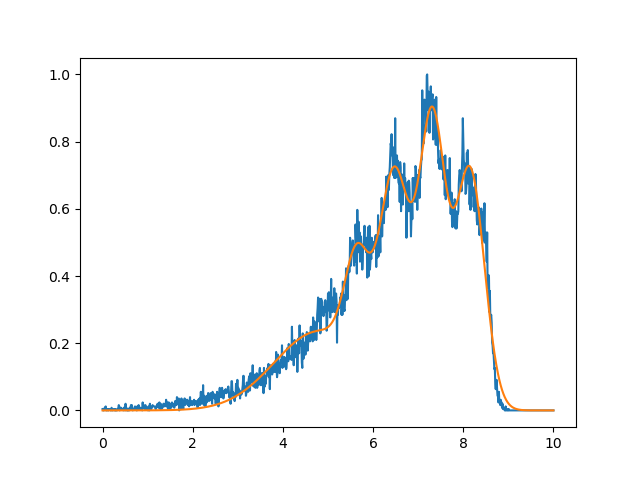

[ 8.14765989 -0.83441322  0.71211494  0.83886218  0.65203512  0.30000001
  0.23575084  0.32111437  0.28997858  0.33762006  0.2675609   0.99999654]
[ 0.00661023  0.00426192  0.00698286  0.0085875   0.00811279  0.00849669
  0.00471892  0.00562205  0.00502016  0.006065    0.00992296  0.02510712]
SiPM GAIN = 1.929101e+06 +- 9.853237e+03 for VDC = 32.000000


In [53]:
param_3200_110  = [8.00, -1.00, 0.70,0.90,0.60,0.45,0.25, 0.10,0.10,0.10,0.10,0.10]
bounds_3200_110 =([7.50, -1.50, 0.50,0.80,0.50,0.30,0.20, 0.07,0.07,0.07,0.07,0.07],
                  [8.60, -0.50, 0.80,0.90,0.80,0.60,0.40, 0.40,0.40,0.80,0.80,1.00])

fit_FBK_gain(data_110,0,5,gain_array_110, gainerr_array_110, bounds_3200_110, param_3200_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 5.6445e+01, final cost 3.2438e+00, first-order optimality 1.49e-04.


<IPython.core.display.Javascript object>


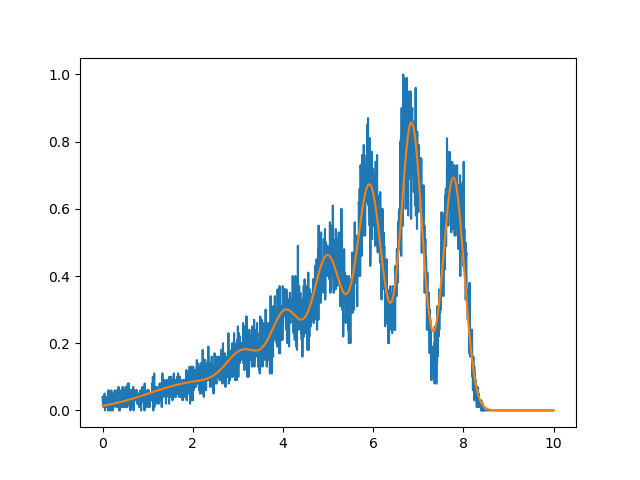

[ 7.77720104 -0.9278008   0.69260221  0.85267993  0.66256874  0.44698984
  0.26318054  0.11304297  0.08592077  0.23703594  0.24209949  0.28985104
  0.33354526  0.34370385  0.36527216  1.15220104]
[ 0.00297886  0.0026067   0.00770743  0.00769202  0.00718565  0.00719605
  0.0090493   0.007268    0.00486118  0.00341172  0.00332748  0.0050309
  0.00844842  0.01421386  0.03339118  0.0851346 ]
SiPM GAIN = 2.145006e+06 +- 6.026501e+03 for VDC = 32.500000


In [54]:
param_3250_110  = [7.90, -1.00, 0.70,0.90,0.60,0.45,0.25,0.25,0.25, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3250_110 =([7.50, -1.50, 0.50,0.80,0.50,0.30,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [8.25, -0.50, 0.80,0.90,0.80,0.60,0.40,0.40,0.40, 0.40,0.40,0.80,0.80,2.00,2.00,2.00])

fit_FBK_gain(data_110,1,7,gain_array_110, gainerr_array_110, bounds_3250_110, param_3250_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 6.1239e+01, final cost 1.4408e+00, first-order optimality 2.74e-04.


<IPython.core.display.Javascript object>


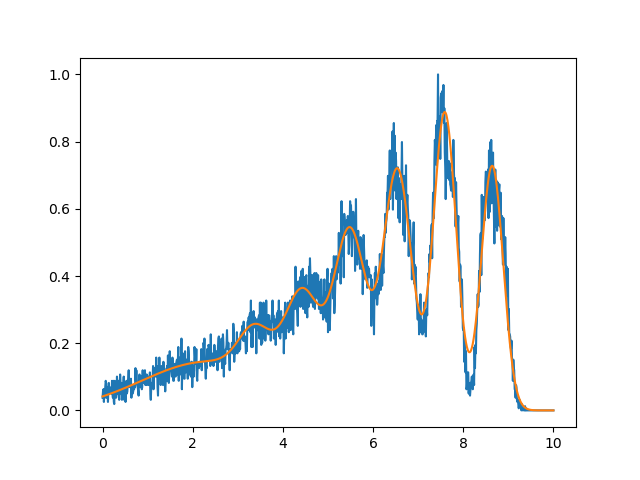

[ 8.64069395 -1.049668    0.72796051  0.88471069  0.71143392  0.51861308
  0.30299949  0.13630922  0.14509867  0.24398892  0.25314762  0.31796434
  0.35484026  0.39314618  0.35988898  1.48162081]
[ 0.00356242  0.00297633  0.01007511  0.00995384  0.00902612  0.00950783
  0.01050649  0.00941474  0.00554392  0.00410847  0.00392417  0.00635991
  0.00944323  0.01790299  0.03353038  0.08981228]
SiPM GAIN = 2.426754e+06 +- 6.881048e+03 for VDC = 33.000000


In [55]:
param_3300_110  = [8.00, -1.00, 0.70,0.90,0.60,0.45,0.25,0.25,0.25, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3300_110 =([8.00, -1.50, 0.50,0.80,0.50,0.30,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [9.50, -0.50, 0.80,0.90,0.80,0.60,0.40,0.40,0.40, 0.40,0.40,0.80,0.80,2.00,2.00,2.00])

fit_FBK_gain(data_110,2,7,gain_array_110, gainerr_array_110, bounds_3300_110, param_3300_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 18, initial cost 6.7991e+01, final cost 2.0780e+00, first-order optimality 2.64e-04.


<IPython.core.display.Javascript object>


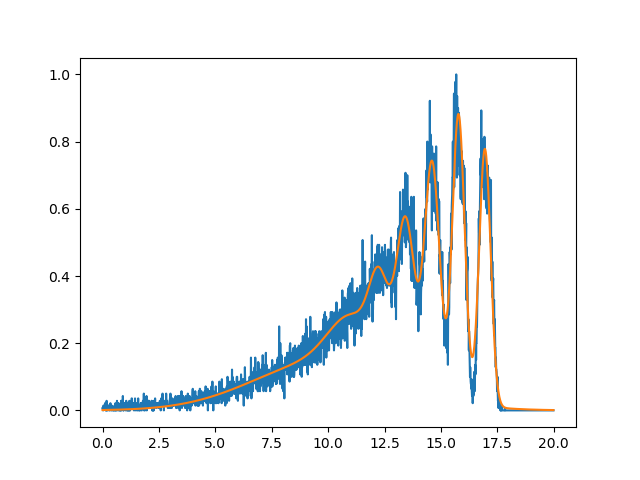

[ 16.95034922  -1.16987606   0.76534327   0.85343397   0.68467295
   0.47718032   0.22910031   0.14343206   0.14909678   0.25477364
   0.27374522   0.33583989   0.40498906   0.43156444   1.03923698
   3.17612876]
[ 0.00296946  0.00267767  0.00847006  0.00835723  0.00776928  0.00824097
  0.00894151  0.00693989  0.00602975  0.00336016  0.00351641  0.00544216
  0.0092251   0.01913033  0.0693535   0.10140132]
SiPM GAIN = 2.704666e+06 +- 6.190560e+03 for VDC = 33.500000


In [56]:
param_3350_110  = [16.50, -1.00, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3350_110 =([16.00, -1.50, 0.50,0.80,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [17.60, -0.50, 0.80,0.90,0.80,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,5.00])

fit_FBK_gain(data_110,3,7,gain_array_110, gainerr_array_110, bounds_3350_110, param_3350_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 7.1768e+01, final cost 2.3297e+00, first-order optimality 1.06e-04.


<IPython.core.display.Javascript object>


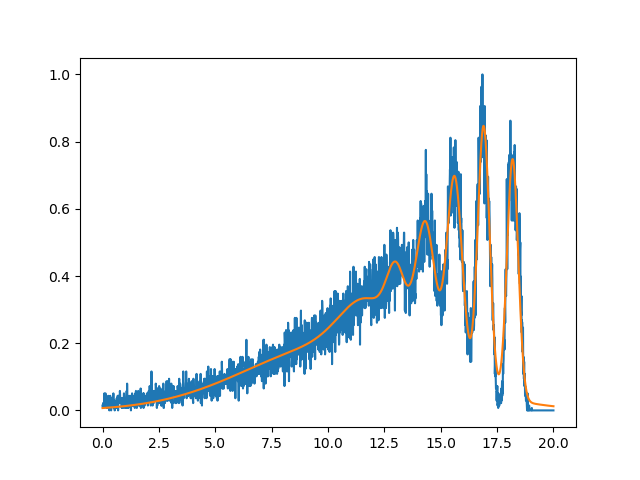

[ 18.18904242  -1.28689801   0.71591321   0.79018205   0.60346726
   0.42149385   0.19468451   0.143486     0.19856756   0.24812883
   0.26500471   0.34548659   0.4344667    0.41855592   1.17683524
   4.04670692]
[ 0.00321305  0.00287377  0.00905478  0.0088713   0.00790662  0.00782628
  0.00867636  0.00635905  0.00525426  0.00369188  0.0036409   0.00624758
  0.01121075  0.02186244  0.07252331  0.08696723]
SiPM GAIN = 2.975212e+06 +- 6.643930e+03 for VDC = 34.000000


In [57]:
param_3400_110  = [18.10, -1.00, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3400_110 =([17.50, -1.50, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [19.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,5.00])

fit_FBK_gain(data_110,4,7,gain_array_110, gainerr_array_110, bounds_3400_110, param_3400_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 35, initial cost 3.4062e+01, final cost 5.9426e-01, first-order optimality 3.35e-05.


<IPython.core.display.Javascript object>


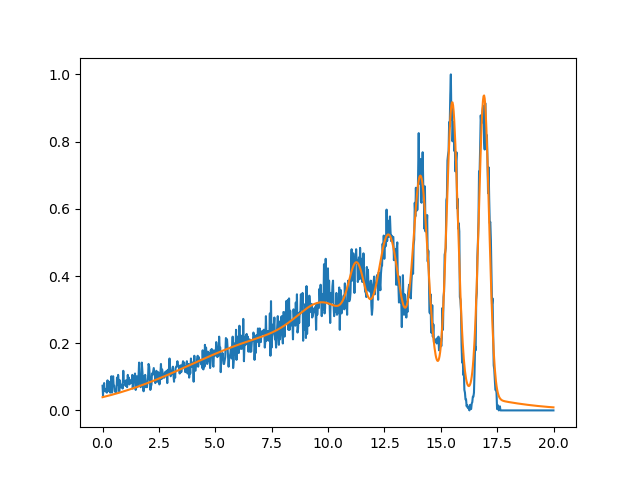

[ 16.91322236  -1.40514301   0.89764708   0.84962036   0.58878954
   0.3718822    0.20164327   0.10493953   0.22629286   0.22490351
   0.24495276   0.32230083   0.47559193   0.36270448   1.11026884
   4.53483034]
[ 0.00311885  0.00296254  0.01196026  0.01154008  0.01013623  0.0089188
  0.01112449  0.00701088  0.00548562  0.00353165  0.00393479  0.00721847
  0.01585115  0.0233258   0.11198228  0.10317634]
SiPM GAIN = 3.248585e+06 +- 6.849171e+03 for VDC = 34.500000


In [58]:
param_3450_110  = [17.00, -1.00, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3450_110 =([16.00, -1.50, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [17.50, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,5.00])

fit_FBK_gain(data_110,5,7,gain_array_110, gainerr_array_110, bounds_3450_110, param_3450_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 14, initial cost 1.7029e+01, final cost 4.1479e-01, first-order optimality 3.13e-05.


<IPython.core.display.Javascript object>


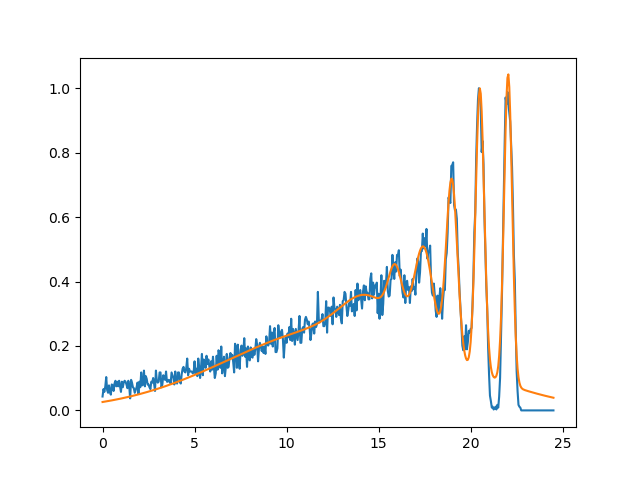

[ 22.03684911  -1.53072834   0.96471837   0.88484193   0.56185643
   0.30624398   0.16438686   0.10703447   0.25919771   0.21751997
   0.23219749   0.30597157   0.5174024    0.37873811   1.37574138
   5.99638993]
[ 0.00436706  0.00441297  0.01828351  0.01769923  0.01546529  0.01303647
  0.01542401  0.00964595  0.00717682  0.00483574  0.00544072  0.01068602
  0.02934077  0.04314968  0.17892253  0.14357345]
SiPM GAIN = 3.538929e+06 +- 1.020247e+04 for VDC = 35.000000


In [59]:
param_3500_110  = [22.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3500_110 =([21.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [23.50, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110,6,7,gain_array_110, gainerr_array_110, bounds_3500_110, param_3500_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 17, initial cost 1.5232e+01, final cost 6.6963e-01, first-order optimality 8.16e-05.


<IPython.core.display.Javascript object>


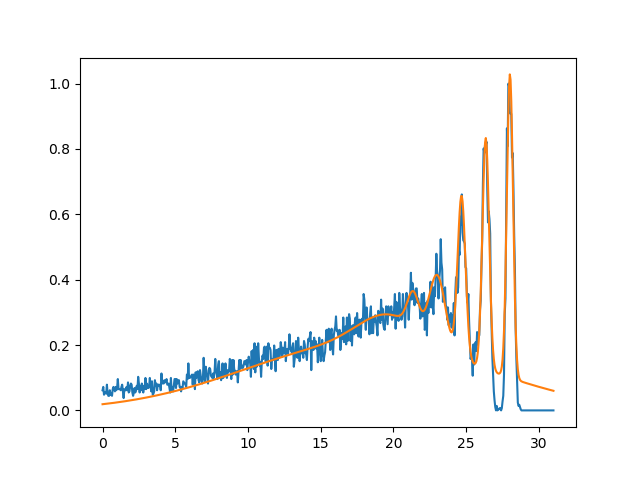

[ 28.01018836  -1.66370168   0.92971836   0.70854656   0.5          0.21582686
   0.10518277   0.09048743   0.2072087    0.2098645    0.23148769
   0.26993633   0.56575244   0.39275083   2.09698405   8.23893855]
[ 0.00515809  0.00547914  0.02095383  0.0199552   0.01858481  0.01501245
  0.01605021  0.01024164  0.00849684  0.00551301  0.00759881  0.01218793
  0.04795294  0.07589957  0.33285493  0.26972925]
SiPM GAIN = 3.846353e+06 +- 1.266736e+04 for VDC = 35.500000


In [60]:
param_3550_110  = [28.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3550_110 =([27.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [29.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110,7,7,gain_array_110, gainerr_array_110, bounds_3550_110, param_3550_110, voltages_array_110,spe_array_110,speres_array_110,2700)

`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 1.8874e+01, final cost 8.4059e-01, first-order optimality 6.64e-05.


<IPython.core.display.Javascript object>


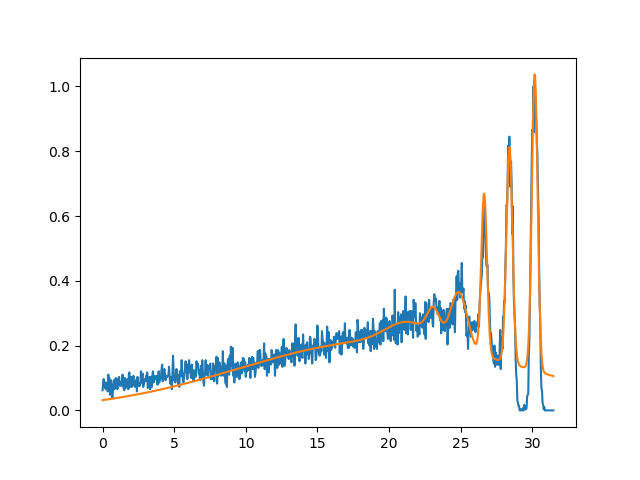

[ 30.17307993  -1.76598614   0.91645112   0.66771712   0.5          0.17417777
   0.08433414   0.06191839   0.21477654   0.20099513   0.21283536
   0.19910696   0.59115855   0.43802102   1.5223552    9.99999981]
[ 0.004576    0.00458951  0.01903386  0.01849639  0.01913668  0.0118148
  0.01420962  0.00836566  0.00484458  0.00485931  0.00686274  0.00899452
  0.05090763  0.08954736  0.2914434   0.24859191]
SiPM GAIN = 4.082827e+06 +- 1.061060e+04 for VDC = 36.000000


In [61]:
param_3600_110  = [30.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3600_110 =([28.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                  [31.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110,8,7,gain_array_110, gainerr_array_110, bounds_3600_110, param_3600_110, voltages_array_110,spe_array_110,speres_array_110,2700)

Max Linearity Error = 2.098%


<IPython.core.display.Javascript object>


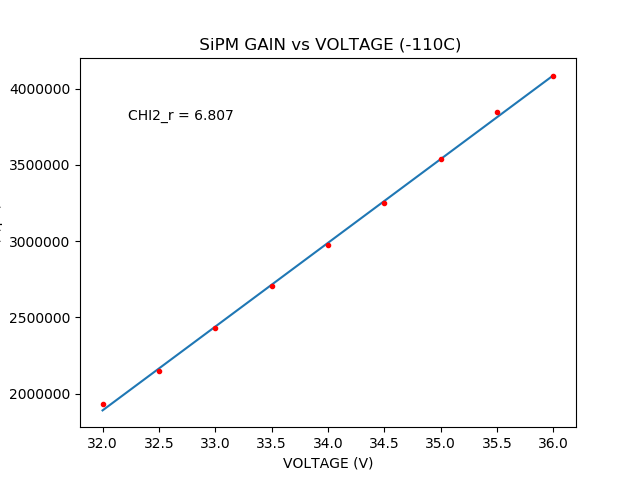

In [62]:
coeff_lin_110, perr_lin_110, XI2_r_110 = fit_library_n.line_fit(-1*gain_array_110,voltages_array_110,gainerr_array_110,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-110C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_110)))
plt.errorbar(voltages_array_110,-1*gain_array_110,fmt='r.',yerr=gainerr_array_110)
plt.plot(voltages_array_110,fit_library_n.line(voltages_array_110,coeff_lin_110[0],coeff_lin_110[1]))

Max Linearity Error = 0.099%


<IPython.core.display.Javascript object>


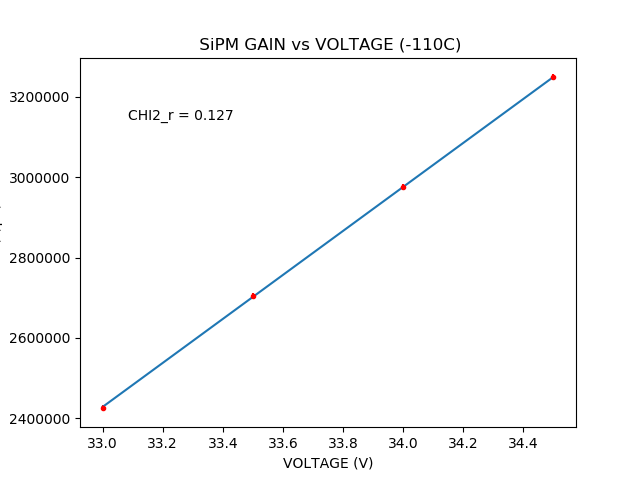

In [63]:
coeff_lin_110, perr_lin_110, XI2_r_110 = fit_library_n.line_fit(-1*gain_array_110[2:6],voltages_array_110[2:6],gainerr_array_110[2:6],'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-110C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_110)))
plt.errorbar(voltages_array_110[2:6],-1*gain_array_110[2:6],fmt='r.',yerr=gainerr_array_110[2:6])
plt.plot(voltages_array_110[2:6],fit_library_n.line(voltages_array_110[2:6],coeff_lin_110[0],coeff_lin_110[1]))

# TEMP -110 - LINEAR REGION


#data=np.array([]).reshape(201,0)
data_110l=[]
filenames=['F2FBK00074.dat','F2FBK00086.dat',
           'F2FBK00075.dat','F2FBK00085.dat',
           'F2FBK00076.dat','F2FBK00084.dat',
           'F2FBK00077.dat','F2FBK00082.dat',
           'F2FBK00078.dat','F2FBK00083.dat',
           'F2FBK00079.dat','F2FBK00081.dat',
           'F2FBK00080.dat']
voltages_array_110l = np.array([33.000,33.125,
                                33.250,33.375,
                                33.500,33.625,
                                33.750,33.875,
                                34.000,34.125,
                                34.250,34.375,
                                34.500])
gain_array_110l = np.zeros(np.shape(voltages_array_110l)[0])
gainerr_array_110l = np.zeros(np.shape(voltages_array_110l)[0])
for i in filenames:
    print i
    with open('/home/viherbos/DAQ_DATA/FBK_measures/GAIN_110L/'+i,'rb') as oscfile:
        #np.hstack([data,np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None)))])   
        data_110l.append(np.array((pd.read_csv(oscfile,delim_whitespace=True,header=None))))   



param_3300_110l  = [15.60, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3300_110l =([15.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [16.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,0,7,gain_array_110l, gainerr_array_110l, bounds_3300_110l, param_3300_110l, voltages_array_110l,2700)

param_3312_110l  = [15.60, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3312_110l =([15.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [16.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,1,7,gain_array_110l, gainerr_array_110l, bounds_3312_110l, param_3312_110l, voltages_array_110l,2700)

param_3325_110l  = [16.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3325_110l =([15.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [17.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,2,7,gain_array_110l, gainerr_array_110l, bounds_3325_110l, param_3325_110l, voltages_array_110l,2700)

param_3337_110l  = [16.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3337_110l =([15.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [17.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,3,7,gain_array_110l, gainerr_array_110l, bounds_3337_110l, param_3337_110l, voltages_array_110l,2700)

param_3350_110l  = [19.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3350_110l =([18.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [20.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,4,7,gain_array_110l, gainerr_array_110l, bounds_3350_110l, param_3350_110l, voltages_array_110l,2700)

param_3362_110l  = [17.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3362_110l =([16.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [18.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,5,7,gain_array_110l, gainerr_array_110l, bounds_3362_110l, param_3362_110l, voltages_array_110l,2700)

param_3375_110l  = [15.60, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3375_110l =([14.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [17.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,6,7,gain_array_110l, gainerr_array_110l, bounds_3375_110l, param_3375_110l, voltages_array_110l,2700)

param_3387_110l  = [18.20, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3387_110l =([17.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [19.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,7,7,gain_array_110l, gainerr_array_110l, bounds_3387_110l, param_3387_110l, voltages_array_110l,2700)

param_3400_110l  = [18.20, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3400_110l =([17.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [19.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,8,7,gain_array_110l, gainerr_array_110l, bounds_3400_110l, param_3400_110l, voltages_array_110l,2700)

param_3412_110l  = [17.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3412_110l =([16.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [18.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,9,7,gain_array_110l, gainerr_array_110l, bounds_3412_110l, param_3412_110l, voltages_array_110l,2700)

param_3425_110l  = [17.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3425_110l =([16.00, -2.00, 0.50,0.50,0.50,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [18.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,10,7,gain_array_110l, gainerr_array_110l, bounds_3425_110l, param_3425_110l, voltages_array_110l,2700)

param_3437_110l  = [15.50, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3437_110l =([14.00, -2.00, 0.50,0.50,0.40,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [17.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,11,7,gain_array_110l, gainerr_array_110l, bounds_3437_110l, param_3437_110l, voltages_array_110l,2700)

param_3450_110l  = [18.00, -1.50, 0.70,0.90,0.60,0.45,0.25,0.10,0.10, 0.10,0.10,0.10,0.10,0.10,0.10,0.10]
bounds_3450_110l =([17.00, -2.00, 0.50,0.50,0.40,0.00,0.00,0.00,0.00, 0.07,0.07,0.07,0.07,0.07,0.07,0.07],
                   [19.00, -0.50, 1.00,1.00,1.00,0.60,0.60,0.60,0.60, 0.40,0.40,0.80,0.80,1.00,5.00,10.00])

fit_FBK_gain(data_110l,12,7,gain_array_110l, gainerr_array_110l, bounds_3450_110l, param_3450_110l, voltages_array_110l,2700)

coeff_lin_110l, perr_lin_110l, XI2_r_110l = fit_library_n.line_fit(-1*gain_array_110l,voltages_array_110l,gainerr_array_110l,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" SiPM GAIN vs VOLTAGE (-110C)")
plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_r_110l)))
plt.errorbar(voltages_array_110l,-1*gain_array_110l,fmt='r.',yerr=gainerr_array_110l)
plt.plot(voltages_array_110l,fit_library_n.line(voltages_array_110l,coeff_lin_110l[0],coeff_lin_110l[1]))

<IPython.core.display.Javascript object>


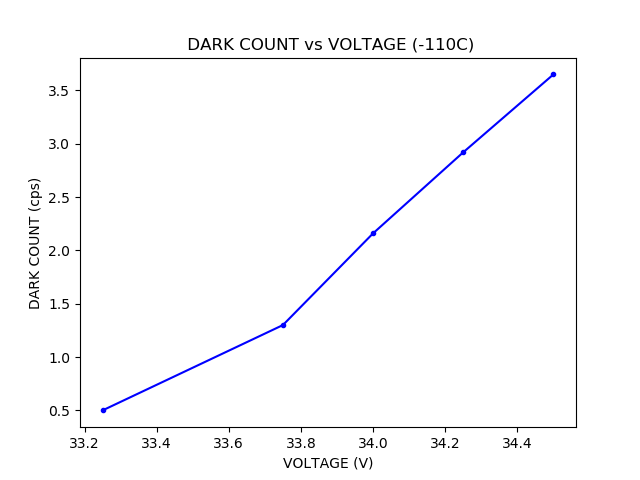

In [64]:
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("DARK COUNT (cps)")
plt.title(" DARK COUNT vs VOLTAGE (-110C)")
x = np.array([33.25,33.75,34.00,34.25,34.5])
y = np.array([0.5, 1.3, 2.16, 2.92, 3.65])
plt.plot(x,y,'b.-')

<IPython.core.display.Javascript object>


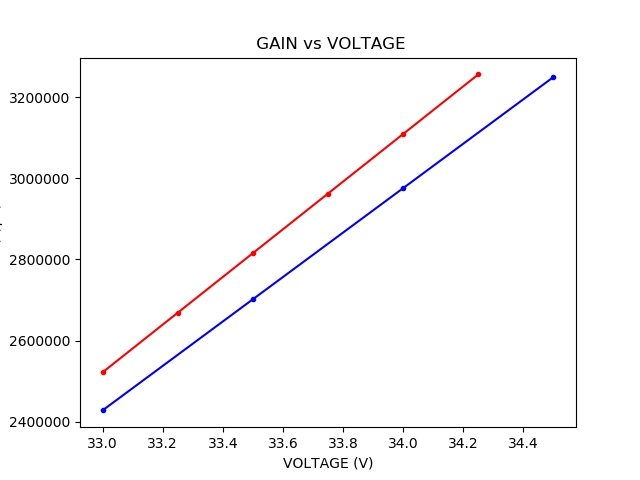

NameError: name 'XI2_r_110l' is not defined

In [65]:
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("GAIN (e/pe)")
plt.title(" GAIN vs VOLTAGE")

plt.plot(voltages_array_110[2:6],fit_library_n.line(voltages_array_110[2:6],coeff_lin_110[0],coeff_lin_110[1]),'b.-')
plt.plot(voltages_array_108[4:10],fit_library_n.line(voltages_array_108[4:10],coeff_lin_108[0],coeff_lin_108[1]),'r.-')
plt.figtext(0.2,0.75, ('RED (-108) // BLUE (-110) ' % (XI2_r_110l)))

Max Linearity Error = 2.098%


<IPython.core.display.Javascript object>


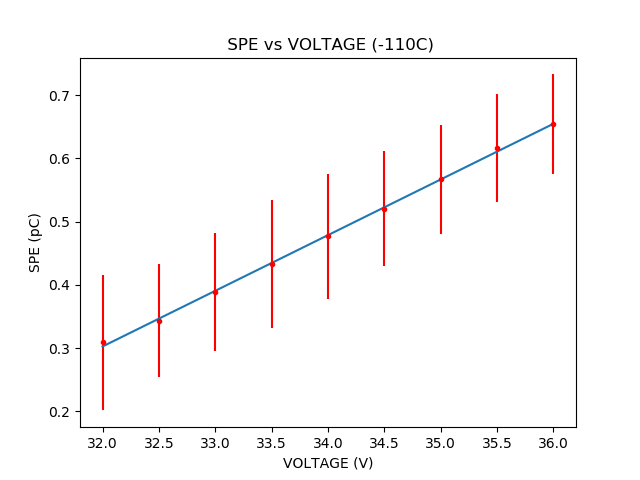

In [66]:
coeff_spe_110, perr_spe_110, XI2_spe_110 = fit_library_n.line_fit(-1*spe_array_110,voltages_array_110,gainerr_array_110,'','','',1,0)
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("SPE (pC)")
plt.title(" SPE vs VOLTAGE (-110C)")
#plt.figtext(0.2,0.75, ('CHI2_r = %0.3f ' % (XI2_spe_110)))
plt.errorbar(voltages_array_110,-1*spe_array_110,fmt='r.',yerr=speres_array_110)
plt.plot(voltages_array_110,fit_library_n.line(voltages_array_110,coeff_spe_110[0],coeff_spe_110[1]))

<IPython.core.display.Javascript object>


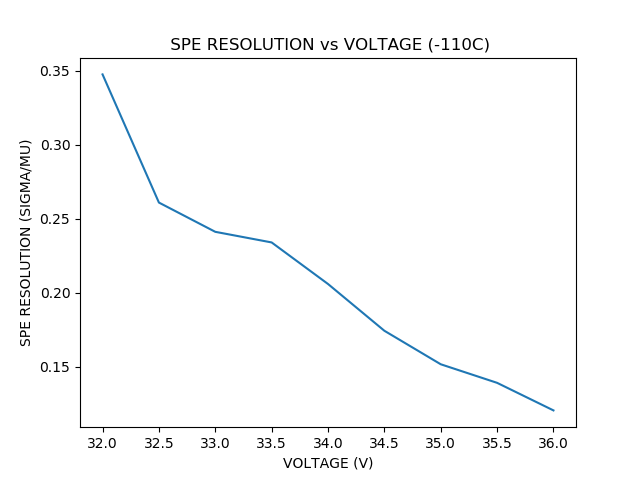

In [67]:
plt.figure()
plt.xlabel("VOLTAGE (V)")
plt.ylabel("SPE RESOLUTION (SIGMA/MU)")
plt.title(" SPE RESOLUTION vs VOLTAGE (-110C)")
plt.plot(voltages_array_110,speres_array_110/(-1*spe_array_110))